In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Tendencia - Avalia a direção da serie temporal
# Sazonalidade - Avalia a recorrência das oscilações da serie temporal
# Resíduos - Os ruidos do sinal

In [5]:
df_path = 'https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv'

In [6]:
df = pd.read_csv(df_path)

df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [7]:
df.index = pd.to_datetime(df['DATE'], format = '%m-%d-%Y')

In [8]:
df.drop('DATE', inplace = True, axis = 1)

In [9]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


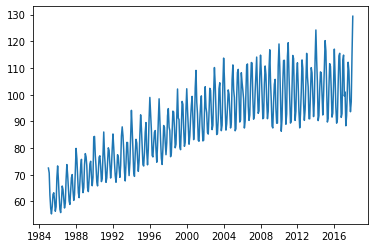

In [11]:
plt.plot(df.index,df['Value'])

In [12]:
resultados = seasonal_decompose(df)

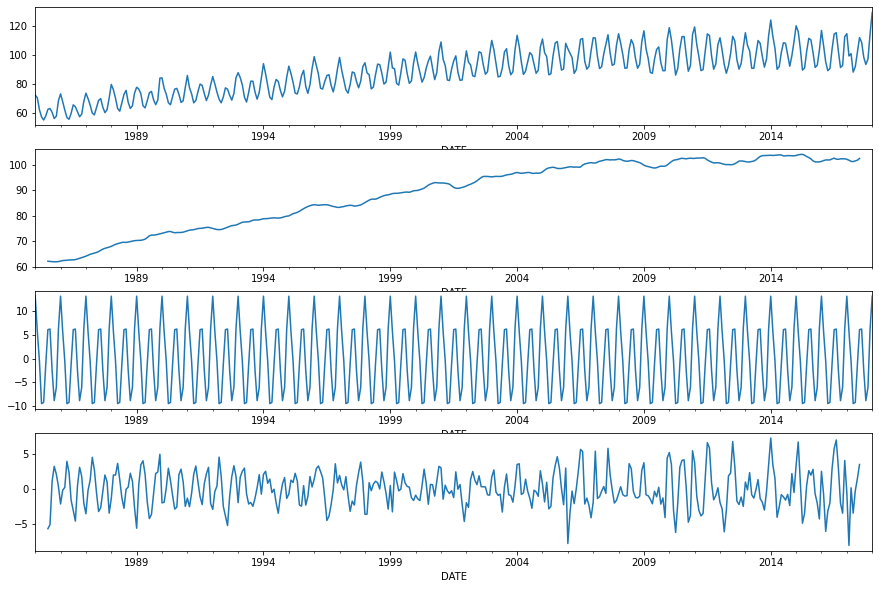

In [14]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.show()

In [15]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipotese nula (não é estacionaria)
# H1 - Hipotese alternativa (rejeição da hipotese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
sns.set_style('darkgrid')

In [18]:
x = df['Value'].values

In [19]:
result = adfuller(x)

print('Teste ADF')
print('Teste Estatistico: ', result[0])
print('P-value: ', result[1])
print('Valores criticos: ')

for key, value in result[4].items():
    print(f'\t{key}:{value}')

Teste ADF
Teste Estatistico:  -2.2569903500472455
P-value:  0.18621469116586759
Valores criticos: 
	1%:-3.4476305904172904
	5%:-2.869155980820355
	10%:-2.570827146203181


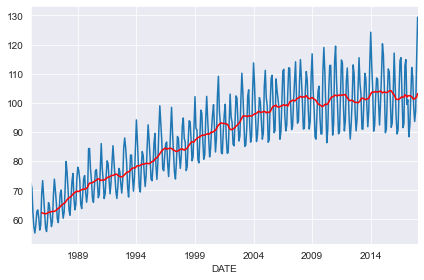

In [20]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax,legend=False)
ma.plot(ax=ax,legend=False,color='r')
plt.tight_layout()
plt.show()

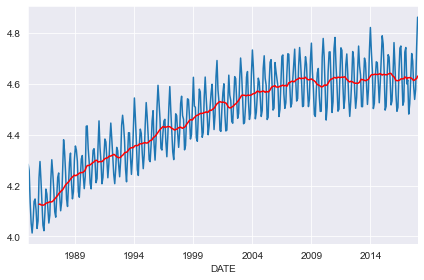

In [21]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax,legend=False)
ma_log.plot(ax=ax,legend=False,color='r')
plt.tight_layout()
plt.show()

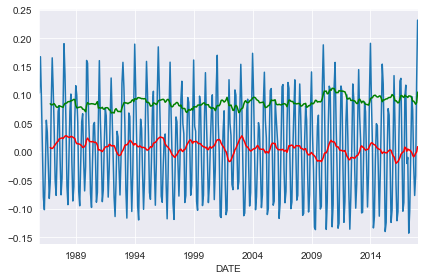

In [23]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax,legend=False)
ma_s.plot(ax=ax,legend=False,color='r')
std.plot(ax=ax,legend=False,color='g')
plt.tight_layout()
plt.show()

In [24]:
x_s = df_s['Value'].values

result_s = adfuller(x_s)

print('Teste ADF')
print('Teste Estatistico: ', result_s[0])
print('P-value: ', result_s[1])
print('Valores criticos: ')

for key, value in result_s[4].items():
    print(f'\t{key}:{value}')

Teste ADF
Teste Estatistico:  -5.211586185365455
P-value:  8.325639759945464e-06
Valores criticos: 
	1%:-3.448147967010838
	5%:-2.8693833397824413
	10%:-2.5709483564645725


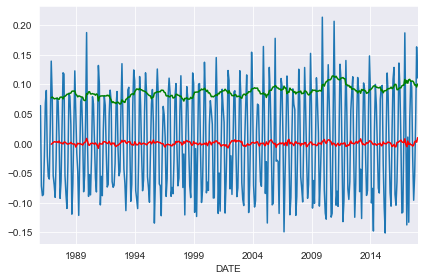

In [26]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax,legend=False)
ma_diff.plot(ax=ax,legend=False,color='r')
std_diff.plot(ax=ax,legend=False,color='g')
plt.tight_layout()
plt.show()

In [28]:
x_diff = df_diff['Value'].dropna().values

result_diff = adfuller(x_diff)

print('Teste ADF')
print('Teste Estatistico: ', result_diff[0])
print('P-value: ', result_diff[1])
print('Valores criticos: ')

for key, value in result_diff[4].items():
    print(f'\t{key}:{value}')

Teste ADF
Teste Estatistico:  -7.651129568145219
P-value:  1.788126735435266e-11
Valores criticos: 
	1%:-3.448294490928673
	5%:-2.869447722240253
	10%:-2.570982681065269
